# Test methods for analyzing images of SDT horiz lines

Leanne Friedrich 4/27/23

## Initialization

In [3]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [4]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import py.vid.noz_detect as nt
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure_horiz.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# test specific files

Exported disturbHoriz3_1_1.250_Usegment_HOh1_l3w1o3_I_SO9_S_3.50_230207_143917_6.png
Usegment: False, MLsegment: False


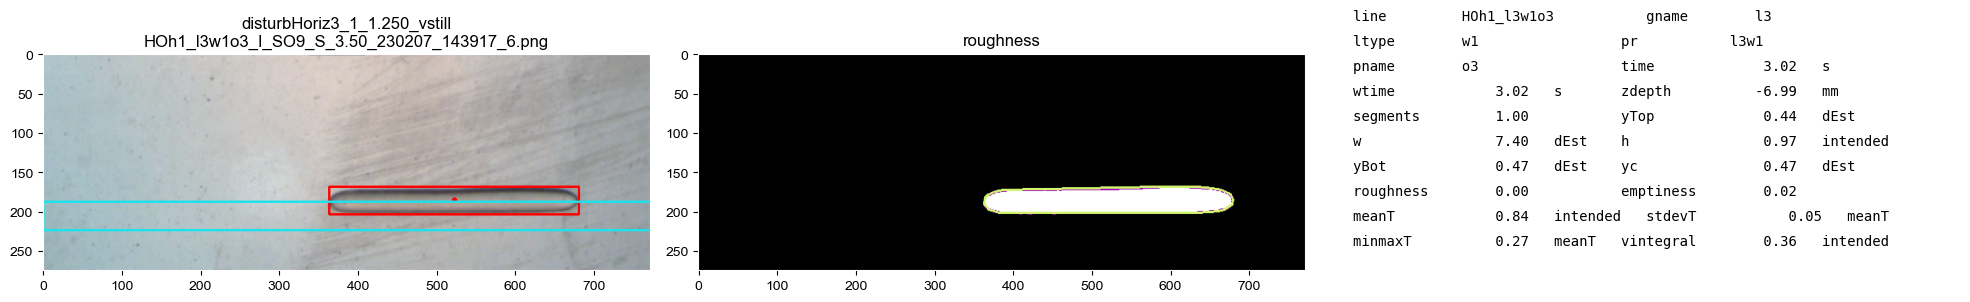

In [31]:
fstr = r'SDT\SO\I_SO9_S_3.50\I_SO9_S_3.50_230207\disturbHoriz3_1_1.250'
fistr = r'disturbHoriz3_1_1.250_vstill_HOh1_l3w1o3_I_SO9_S_3.50_230207_143917_6.png'
folder = os.path.join(cfg.path.server, fstr)
vs = me.fileHorizSDT(os.path.join(folder, fistr), diag=2, overrideSegment=True)

In [402]:
vs.export()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_2_1.000\disturbHoriz3_2_1.000_failures_I_SO10_S_3.00_230208_104442_3.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_2_1.000\disturbHoriz3_2_1.000_measure_I_SO10_S_3.00_230208_104442_3.csv


# create cases for unit test

In [3]:
tg = me.trainingGenerator(os.path.join(cfg.path.server, 'SDT')
                          , excludeFolders=[]
                          , mustMatch='disturbHoriz')

In [215]:
file = tg.randomFile()

Usegment: True, MLsegment: True


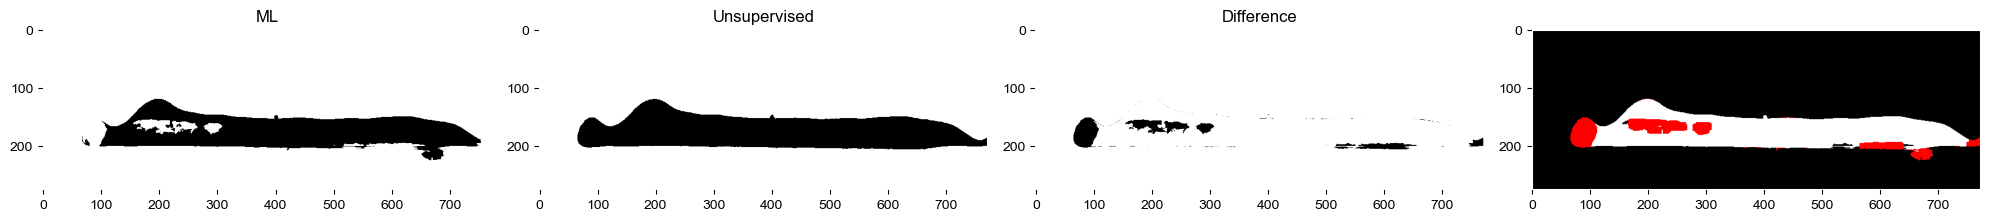

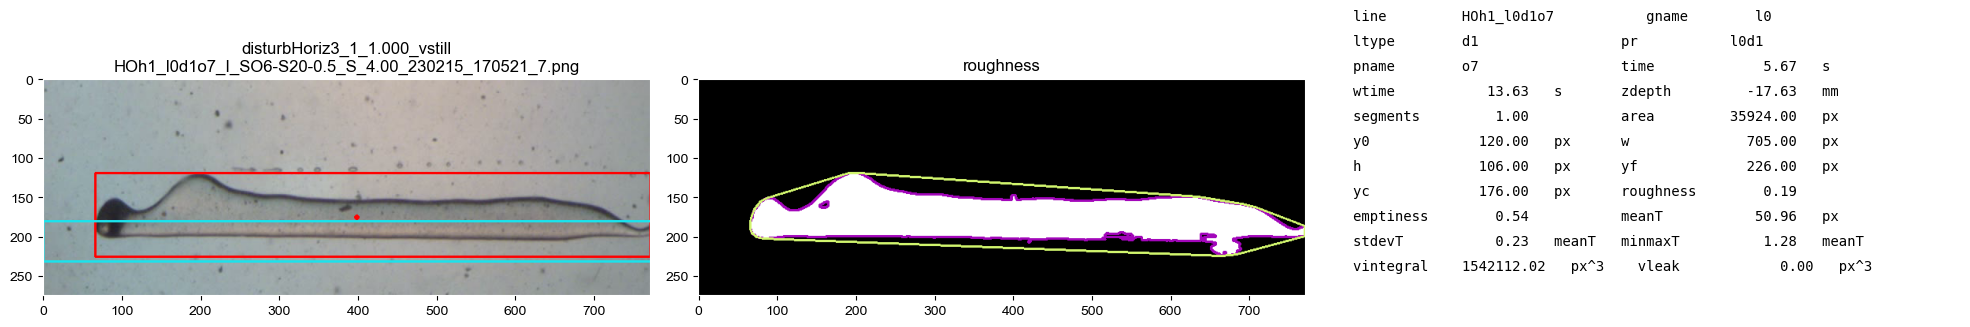

In [216]:
vs = me.fileHorizSDT(file, diag=2, overrideSegment=False)

In [359]:
vs.addToTestFile()

INFO: Exported C:\Users\lmf1\Documents\GitHub\embedded3DPvids\tests\test_SDTHoriz.csv


# unit test

..........F...............F..F.F..............
FAIL: runTest (test_SDTHoriz.TestSDTHoriz)
----------------------------------------------------------------------
AssertionError: False is not true : Erroneous measurement in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_vstill_HOh3_l0w1o7_I_SO10_S_3.00_230208_133025_6.png: 10

FAIL: runTest (test_SDTHoriz.TestSDTHoriz)
----------------------------------------------------------------------
AssertionError: False is not true : test_emptiness failed in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\singleDoubleTriple\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-0.5_S_3.00_230215\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_vstill_HOh1_l3w1o7_I_SO6-S20-0.5_S_3.00_230215_112106_7.png: 26

FAIL: runTest (test_SDTHoriz.TestSDTHoriz)
----------------------------------------------------------------------
AssertionError: Fals

TEST 10 (excel row 12)
Folder: singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_3_0.750
File: disturbHoriz3_3_0.750_vstill_HOh3_l0w1o7_I_SO10_S_3.00_230208_133025_6.png


emptiness        yBot       meanT  segments
expected -1.0000000 -1.00000000 -1.00000000      -1.0
actual    0.1775248 -1.20557992  2.82875846       1.0

TEST 26 (excel row 28)
Folder: singleDoubleTriple\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-0.5_S_3.00_230215\disturbHoriz3_1_0.500
File: disturbHoriz3_1_0.500_vstill_HOh1_l3w1o7_I_SO6-S20-0.5_S_3.00_230215_112106_7.png


emptiness        yBot       meanT  segments
expected  0.20754469  0.22385685  0.93308295       1.0
actual    0.24382070  0.52750294  0.79014539       1.0

TEST 29 (excel row 31)
Folder: singleDoubleTriple\SO\I_SO11_S_3.50\I_SO11_S_3.50_230214\disturbHoriz3_2_0.875
File: disturbHoriz3_2_0.875_vstill_HOh2_l1w1o3_I_SO11_S_3.50_230214_144313_1.png


emptiness        yBot       meanT  segments
expected  0.04028841  0.31444462  0.92127343       1.0
actual    0.05460024  0.31444462  0.91989117       1.0

TEST 31 (excel row 33)
Folder: singleDoubleTriple\SO\I_SO11_S_3.50\I_SO11_S_3.50_230214\disturbHoriz3_1_1.000
File: disturbHoriz3_1_1.000_vstill_HOh1_l3d1p3_I_SO11_S_3.50_230214_140250_3.png


emptiness        yBot  meanT  segments
expected  0.08354941  0.30324243   -1.0       1.0
actual    0.08601944  0.27988504    NaN       1.0

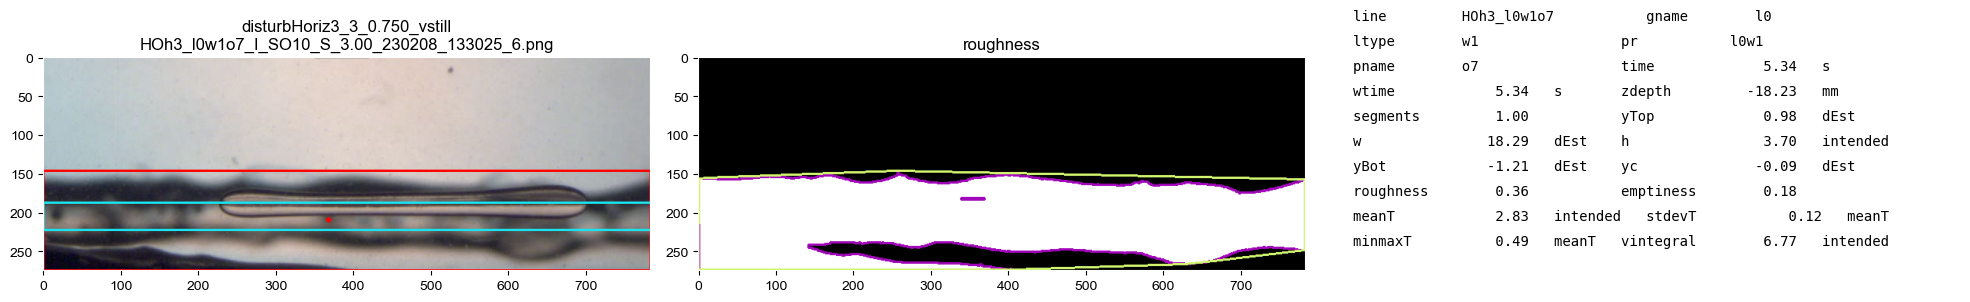

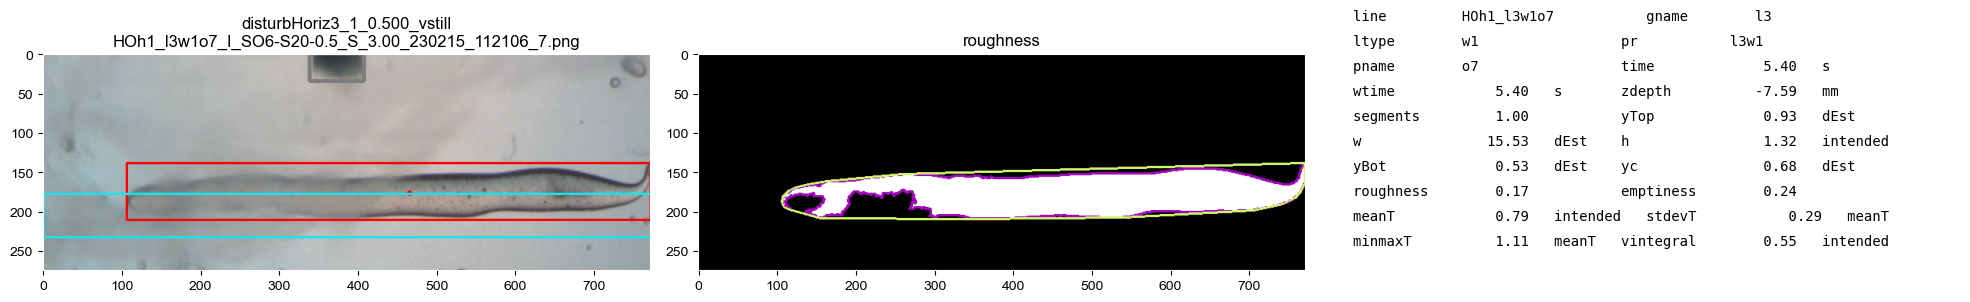

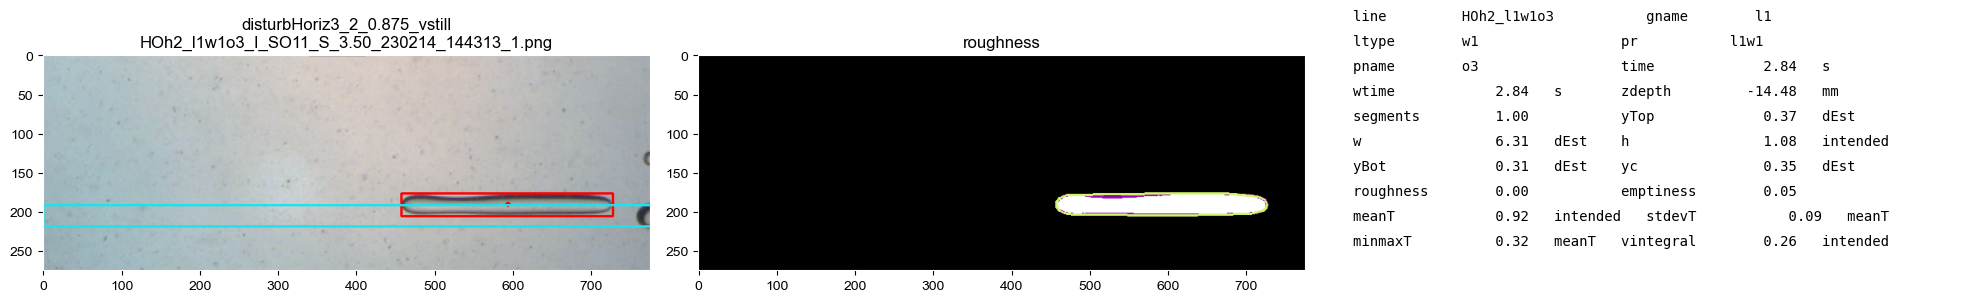

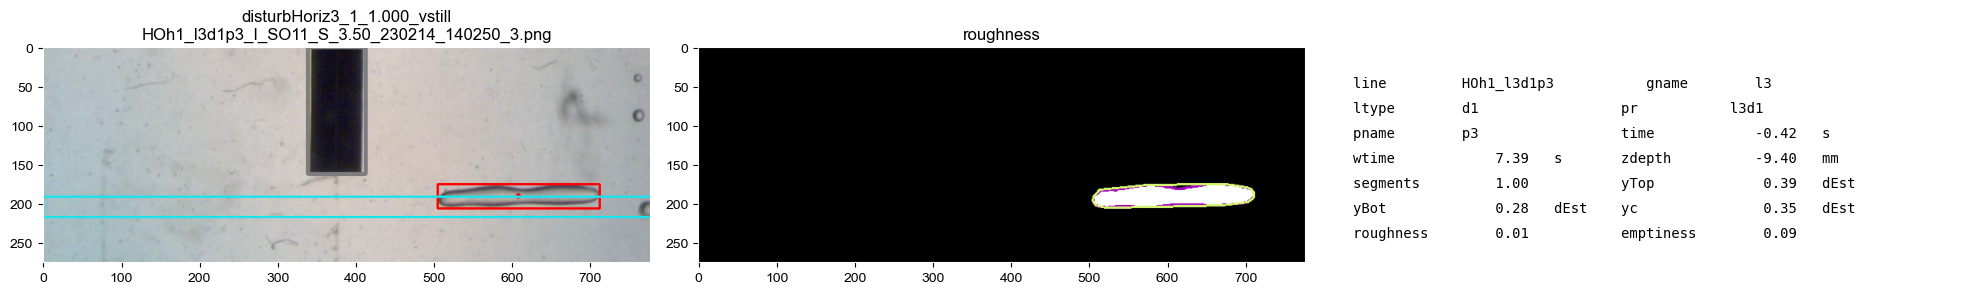

In [319]:
ut = me.unitTester('SDTHoriz', me.fileHorizSDT)
ut.run()
ut.compareAll()

TEST 31 (excel row 33)
Folder: singleDoubleTriple\SO\I_SO11_S_3.50\I_SO11_S_3.50_230214\disturbHoriz3_1_1.000
File: disturbHoriz3_1_1.000_vstill_HOh1_l3d1p3_I_SO11_S_3.50_230214_140250_3.png


emptiness        yBot  meanT  segments
expected  0.08354941  0.30324243   -1.0       1.0
actual    0.10531029  0.23317026    NaN       1.0

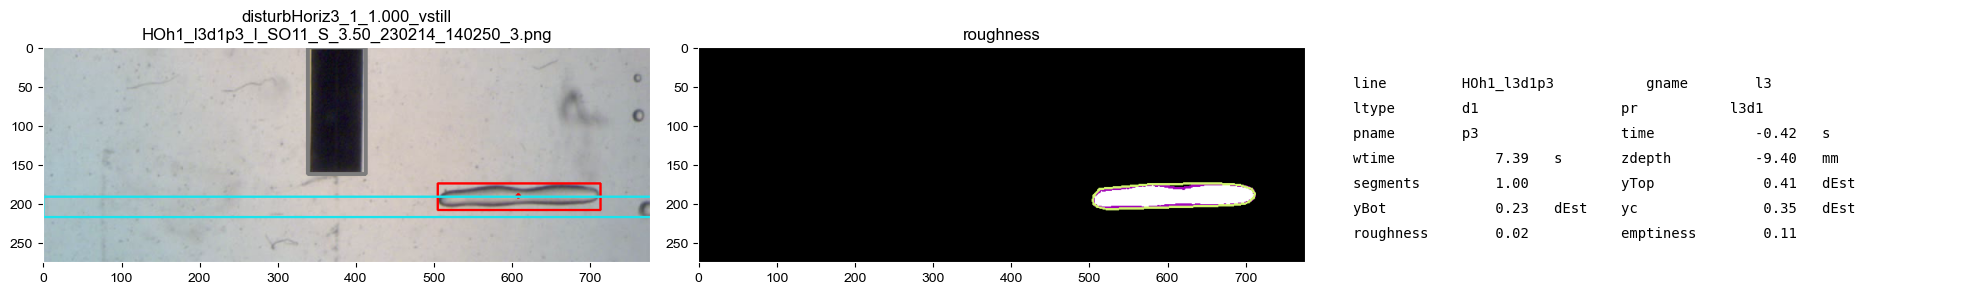

In [322]:
i = ut.failedFiles[3]
ut.compareTest(i, diag=1)

TEST 31 (excel row 33)
Folder: singleDoubleTriple\SO\I_SO11_S_3.50\I_SO11_S_3.50_230214\disturbHoriz3_1_1.000
File: disturbHoriz3_1_1.000_vstill_HOh1_l3d1p3_I_SO11_S_3.50_230214_140250_3.png
INFO: Exported C:\Users\lmf1\Documents\GitHub\embedded3DPvids\tests\test_SDTHoriz.csv


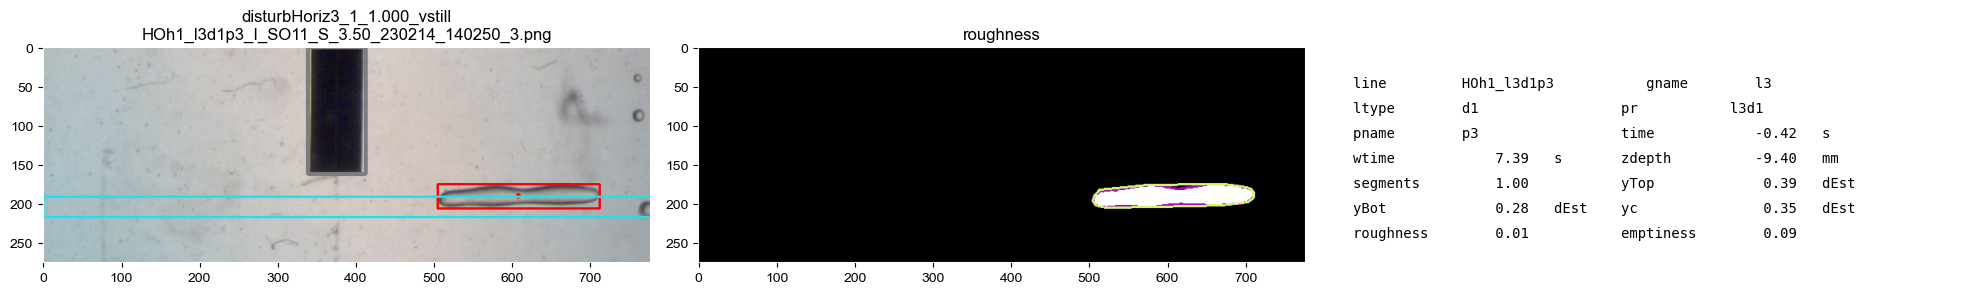

In [323]:
ut.keepTest(i)

TEST 0 (excel row 2)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+z_1.250
File: disturbXS2_2_+z_1.250_vstill_HOx2_l2w2o1_I_SO9_S_3.00_230207_120838_1.png
TEST 2 (excel row 4)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+z_1.250
File: disturbXS2_2_+z_1.250_vstill_HOx2_l2w1o1_I_SO9_S_3.00_230207_120838_1.png
TEST 4 (excel row 6)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_3_+z_1.250
File: disturbXS2_3_+z_1.250_vstill_HOx3_l2w1_I_SO9_S_3.00_230207_142925_4.png
TEST 6 (excel row 8)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_3_+y_1.250
File: disturbXS2_3_+y_1.250_vstill_HIx3_l1w3o1_I_SO9_S_3.00_230207_141609_1.png
TEST 7 (excel row 9)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_3_+y_1.250
File: disturbXS2_3_+y_1.250_vstill_HIx3_l3w2_I_SO9_S_3.00_230207_141609_1.png
TEST 8 (excel row 10)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3

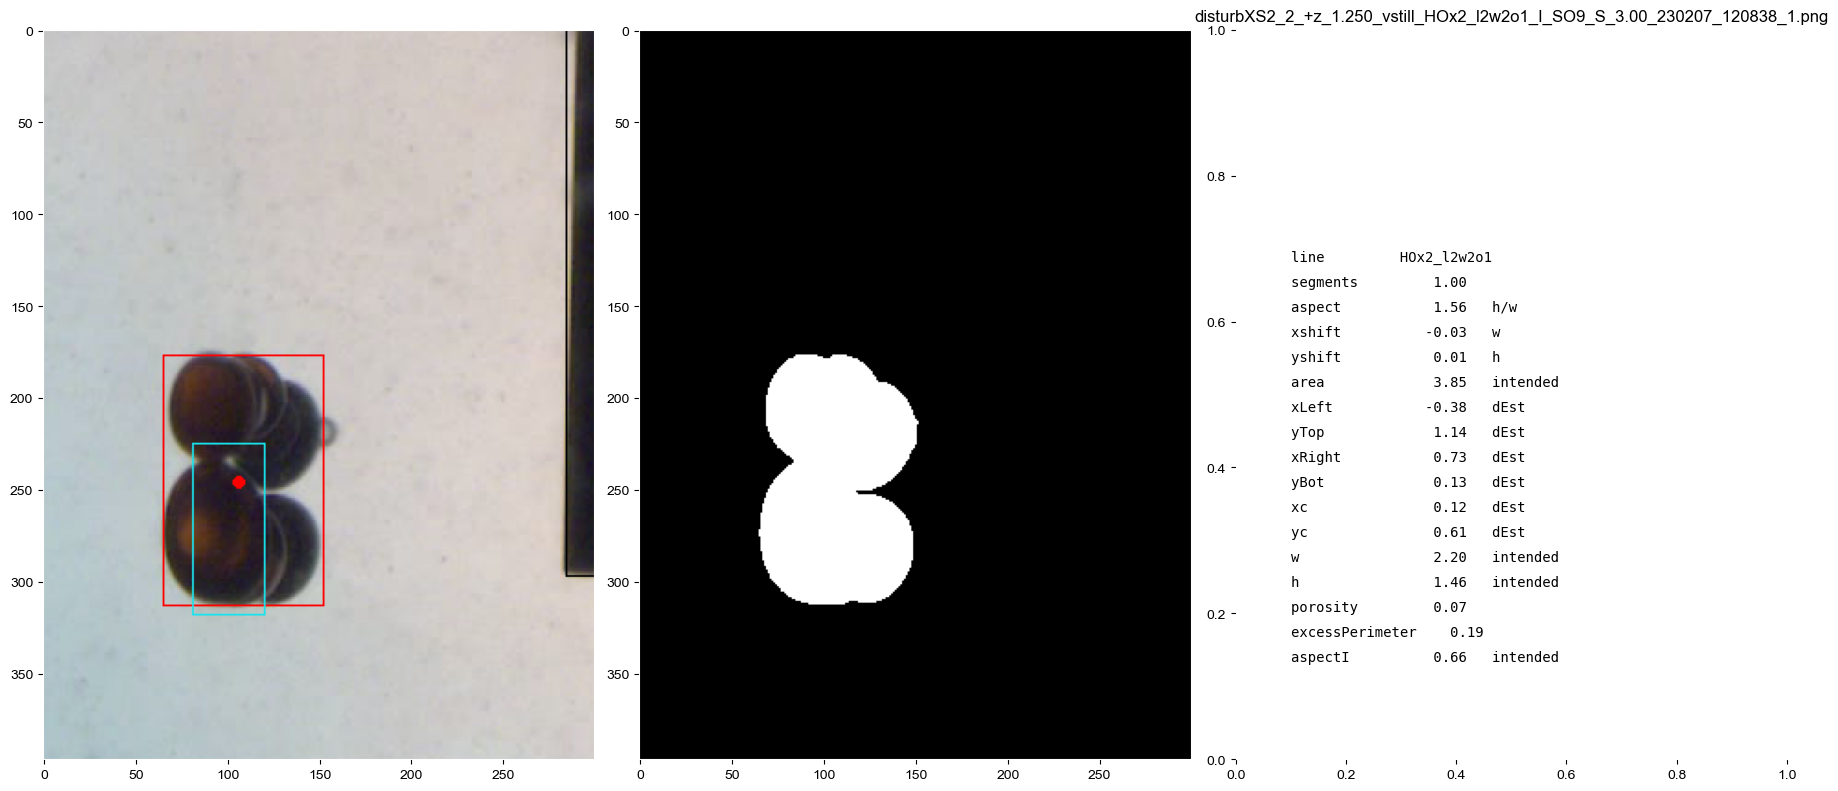

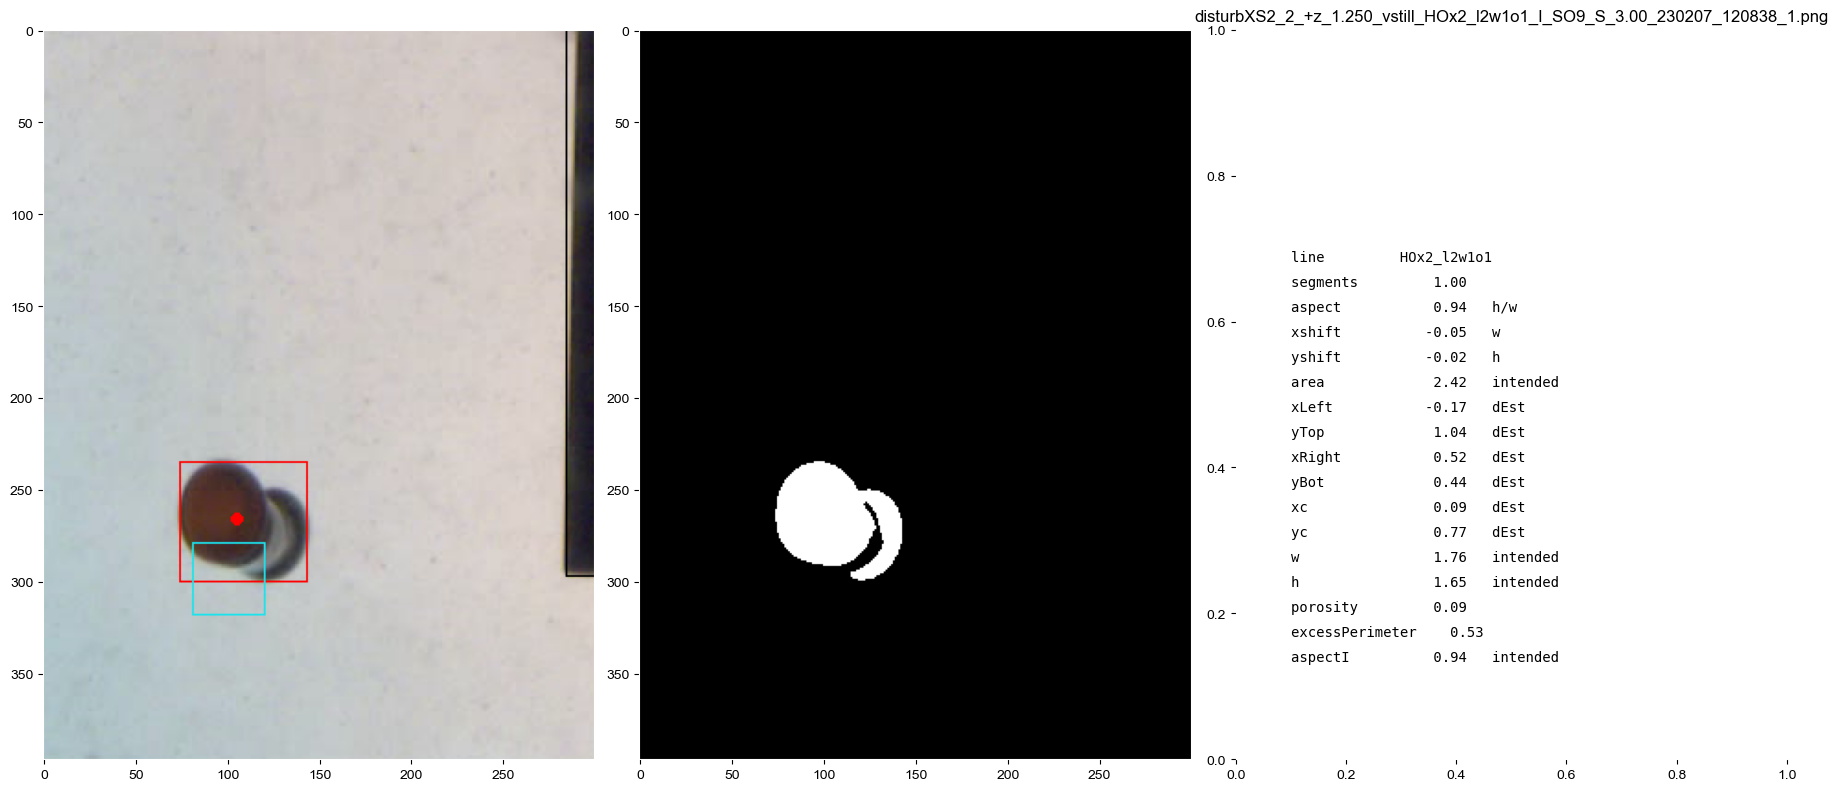

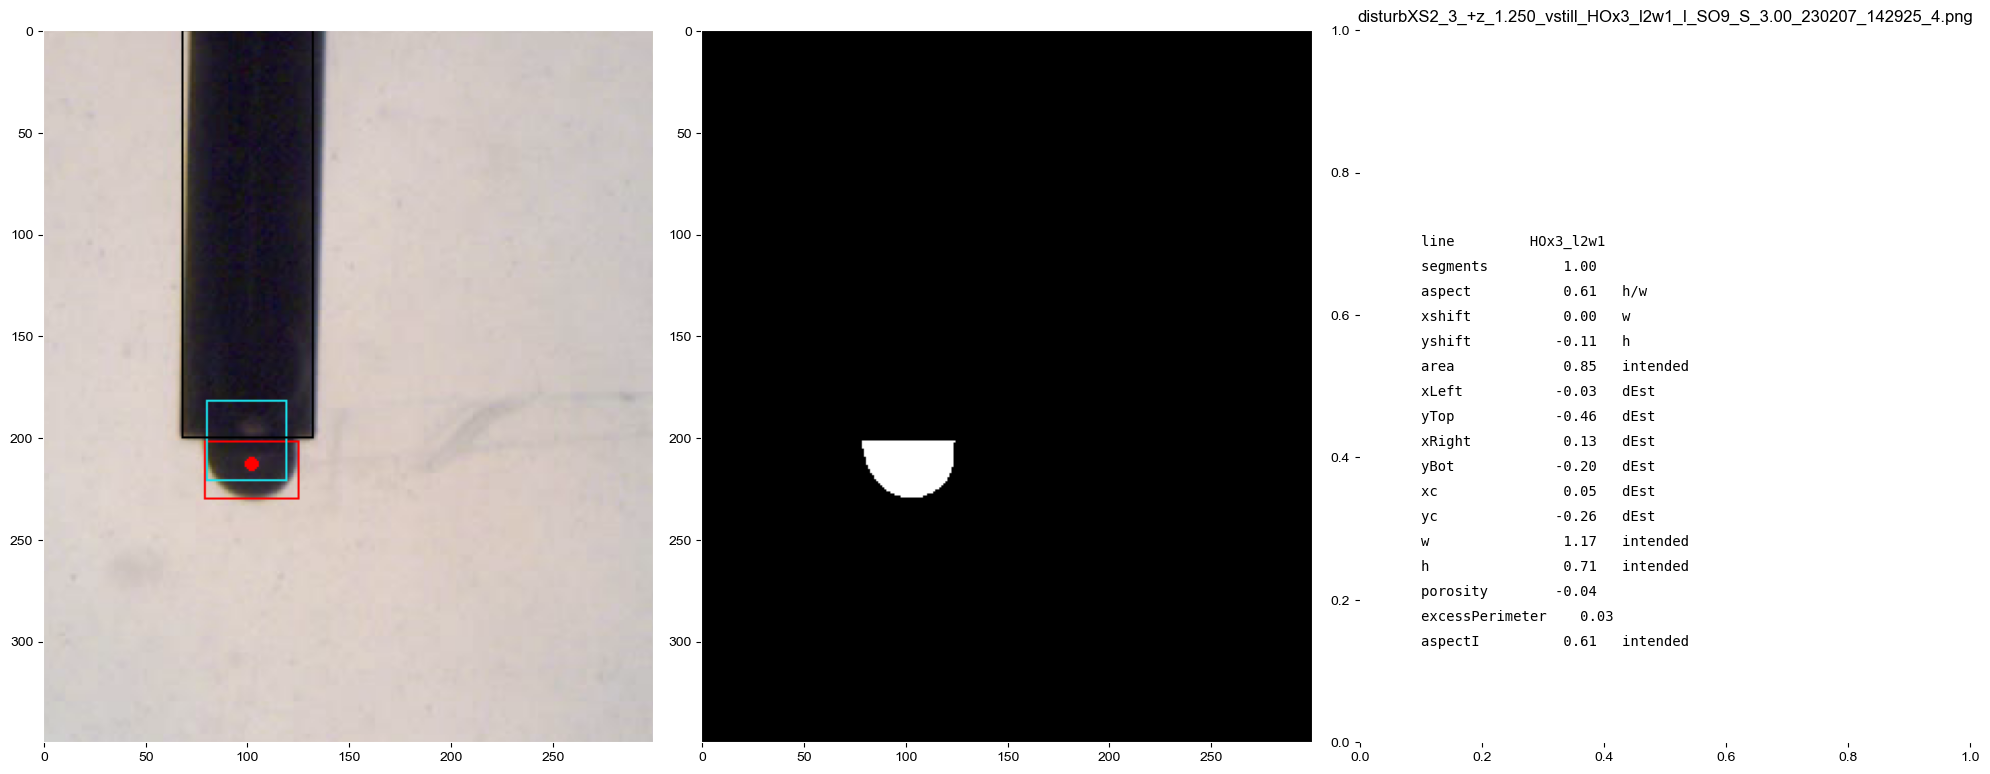

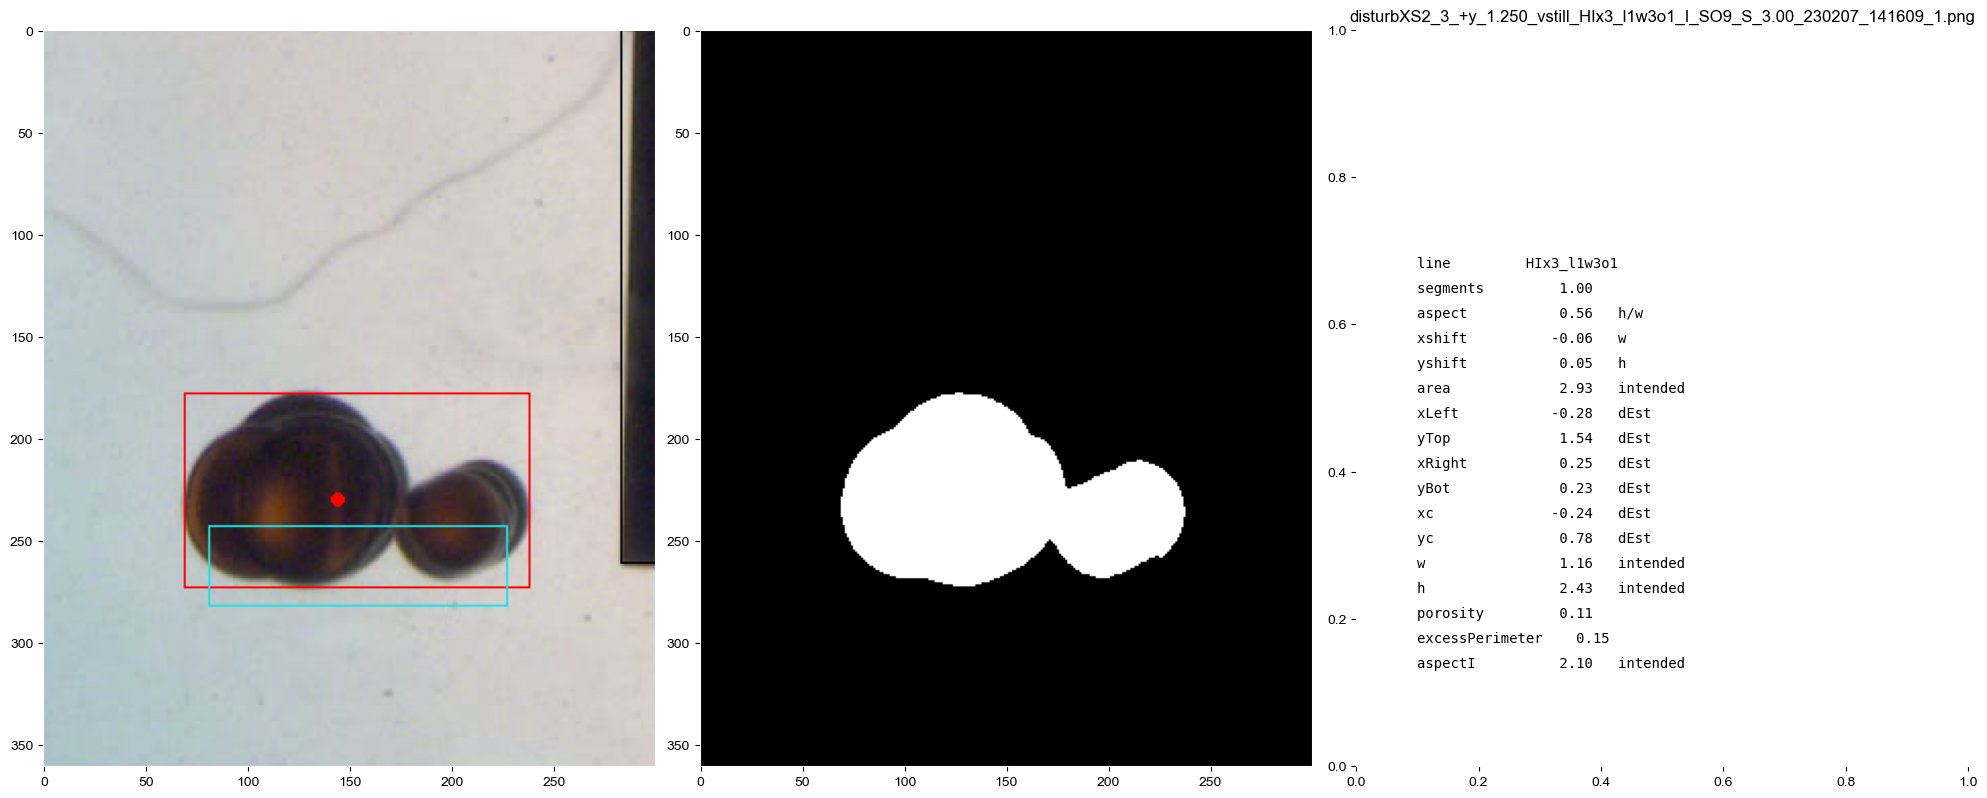

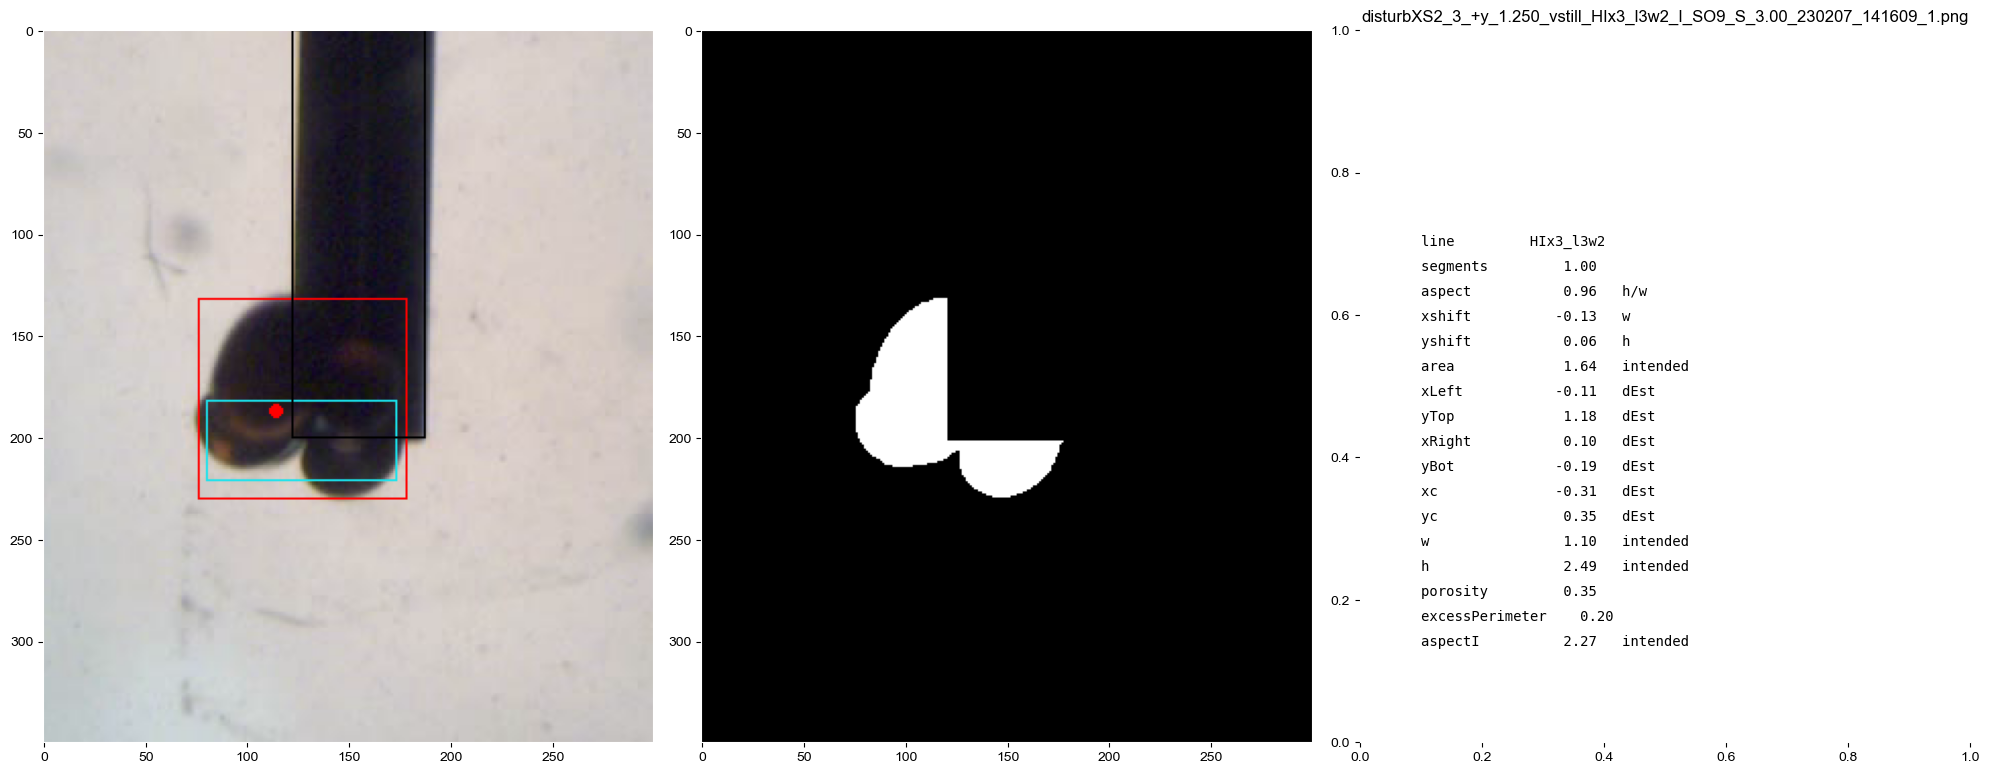

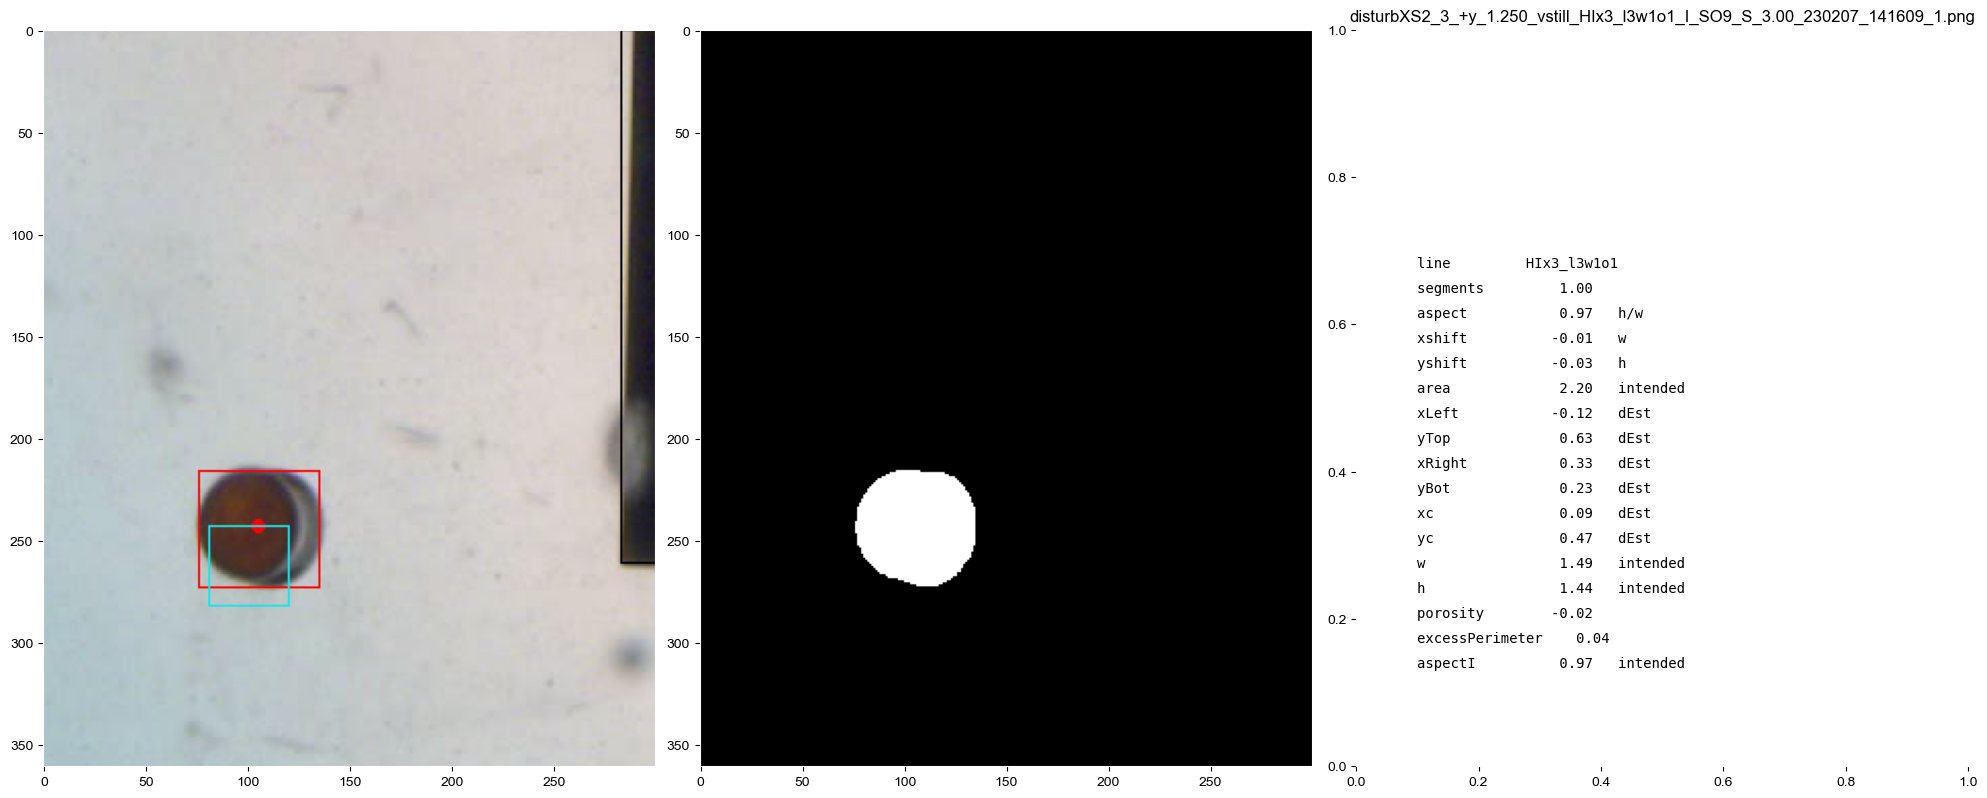

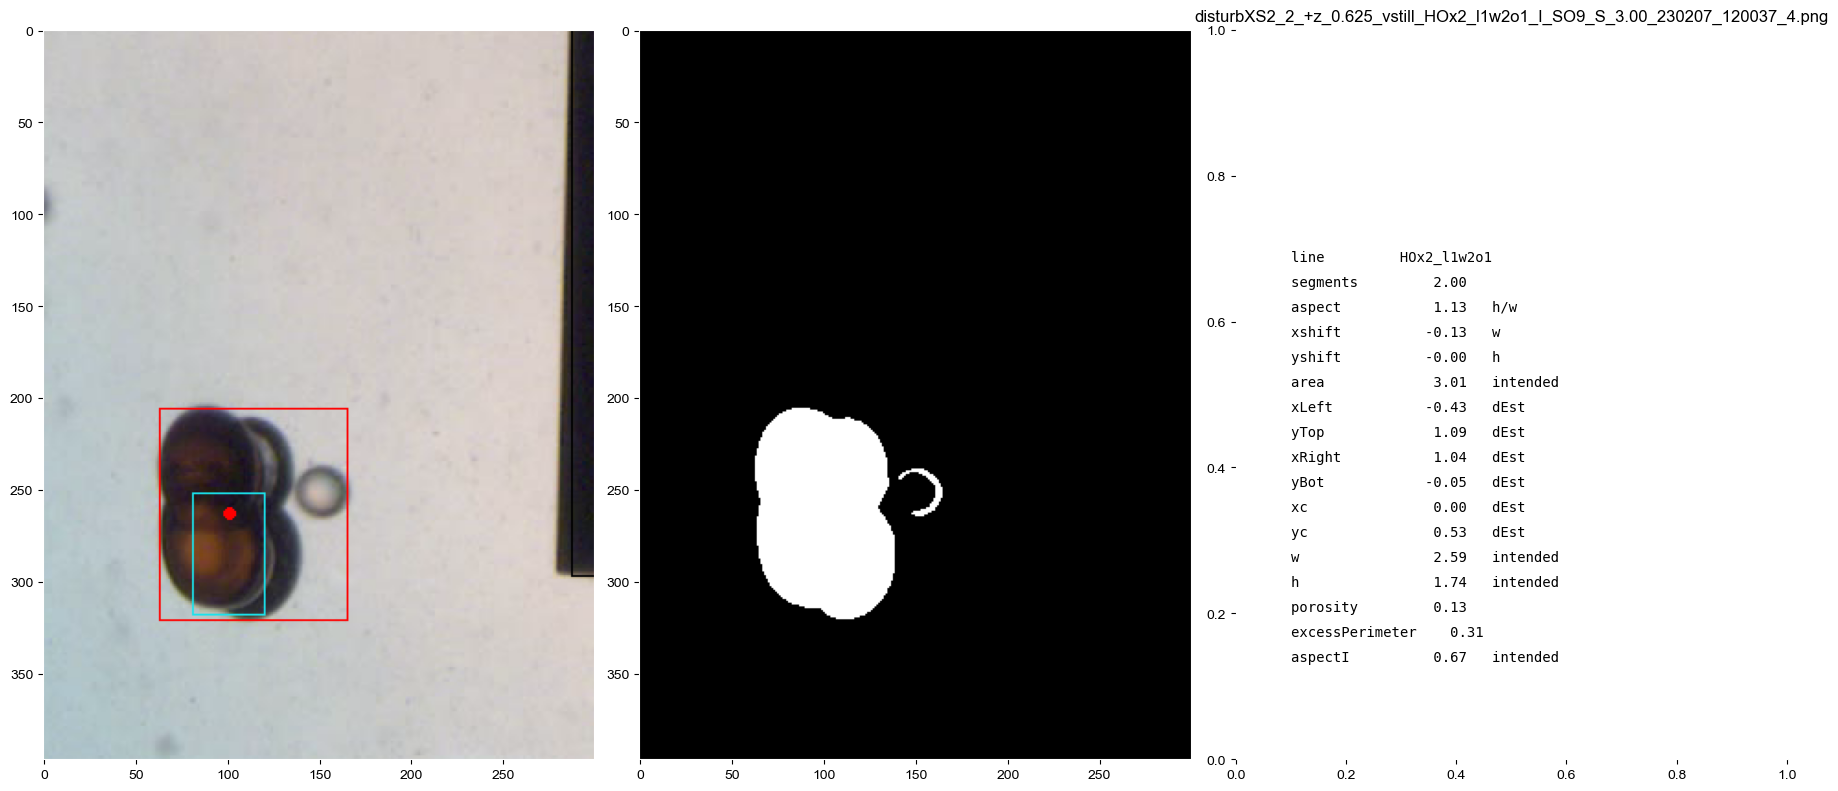

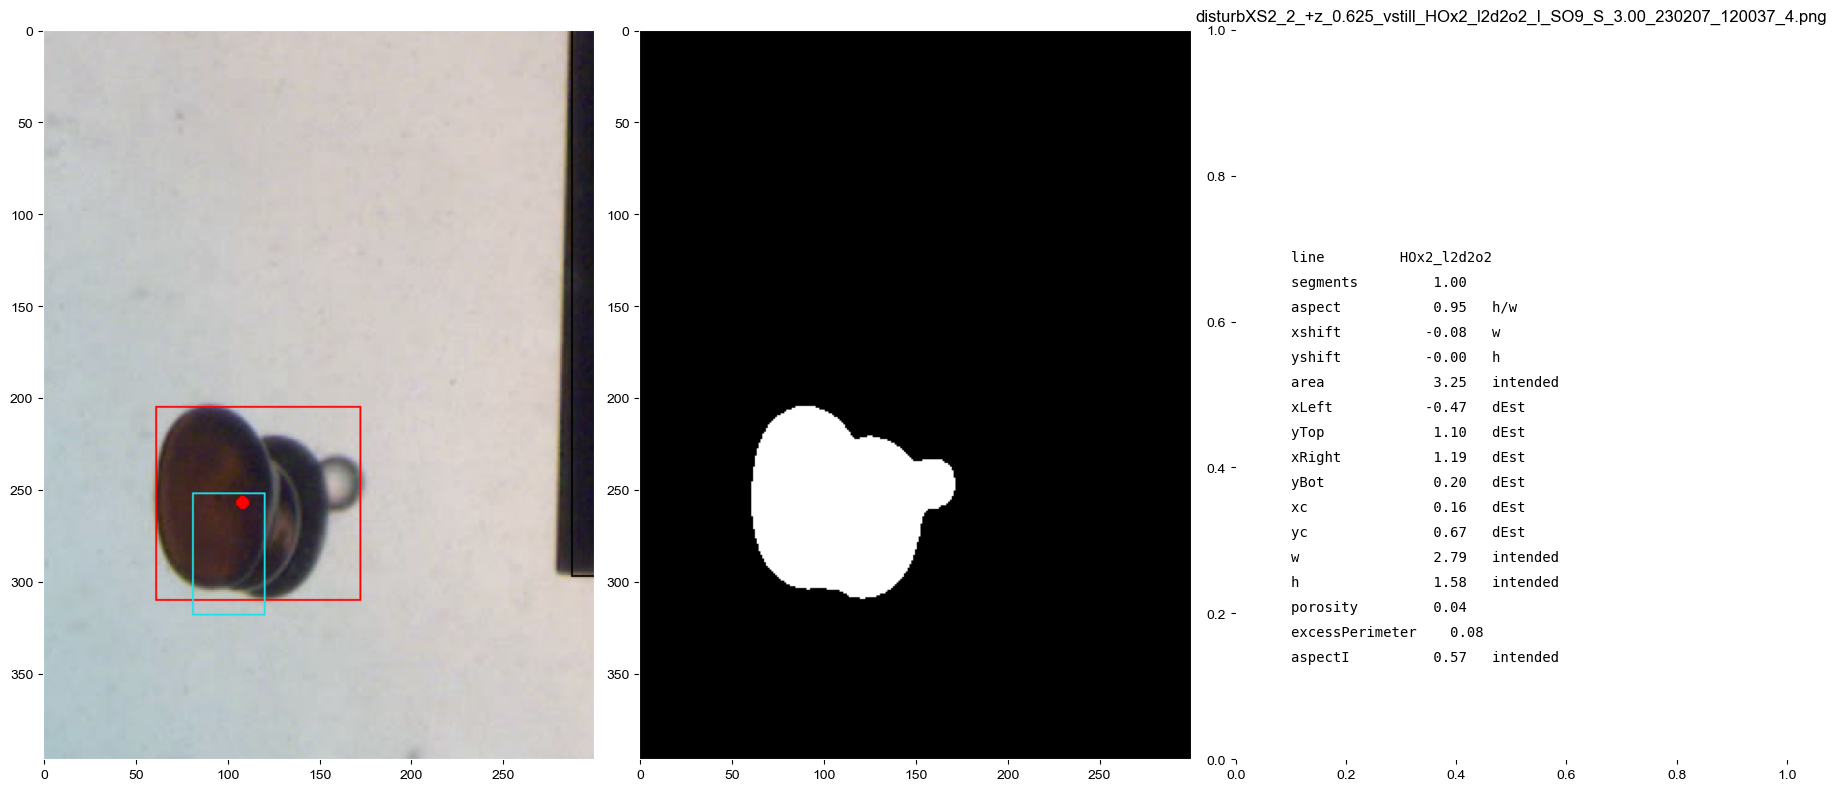

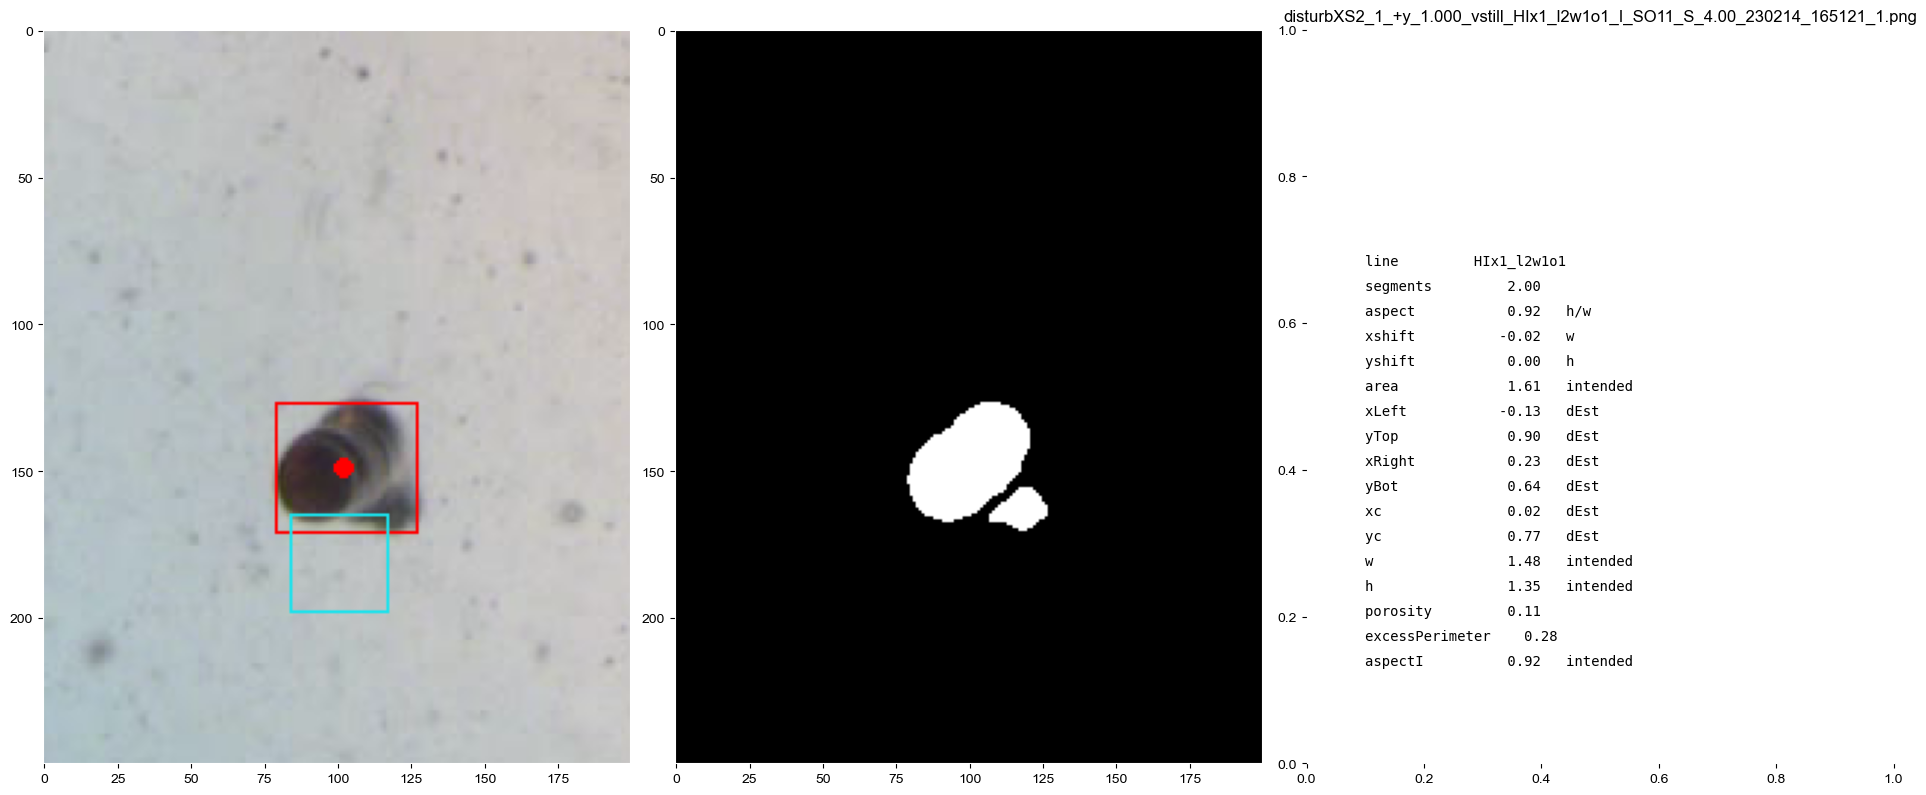

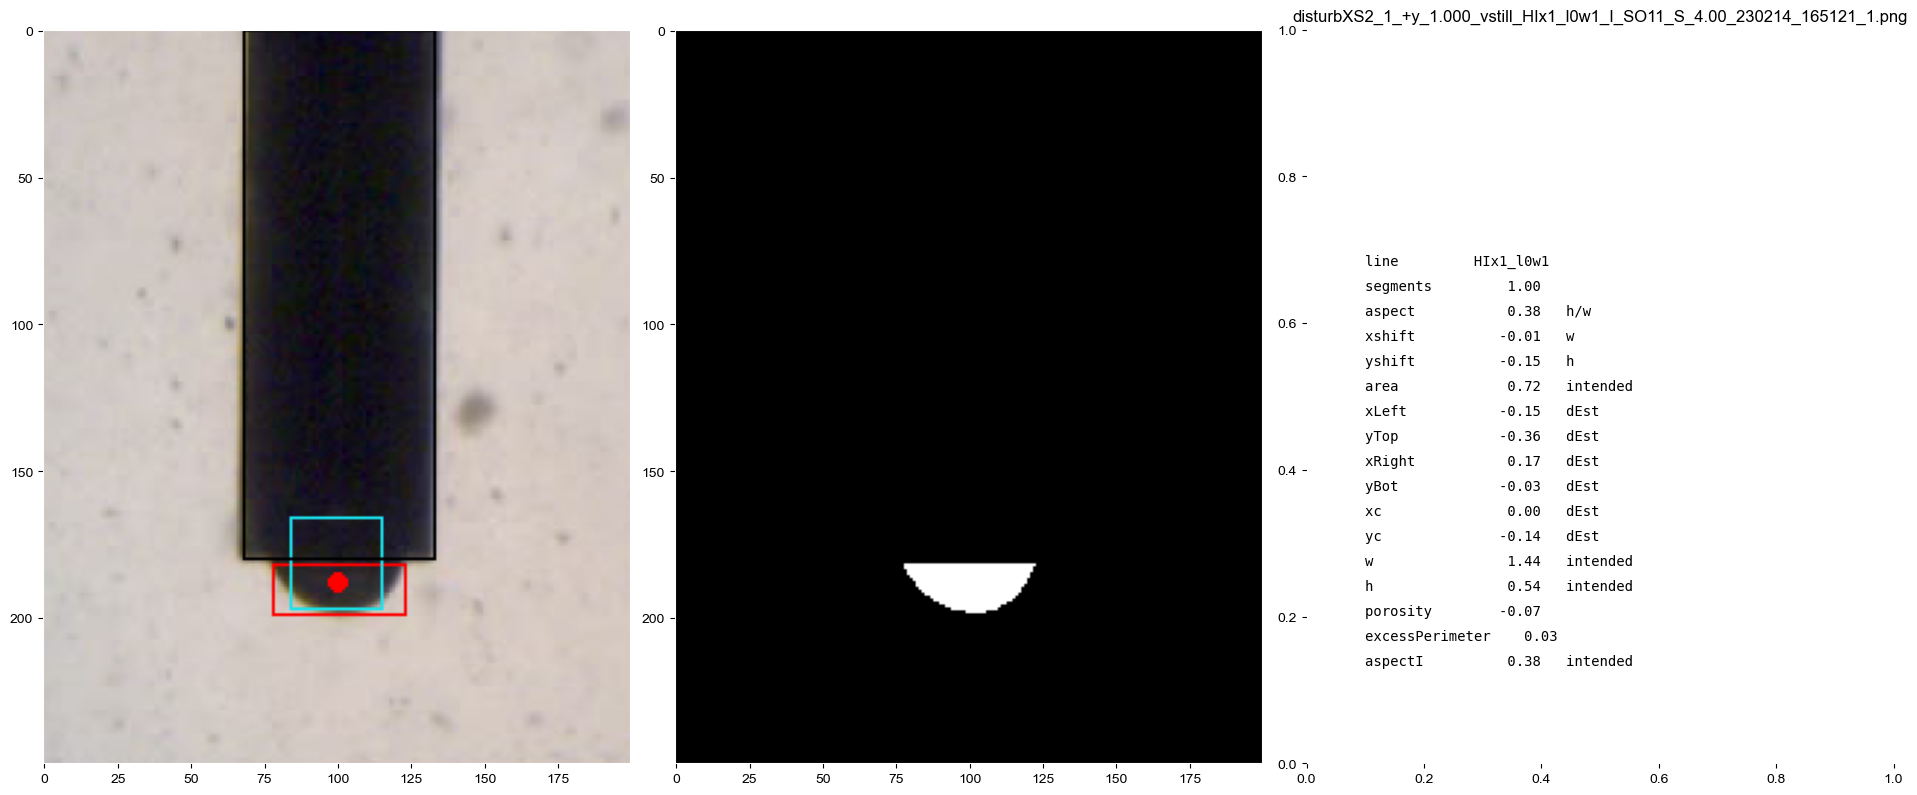

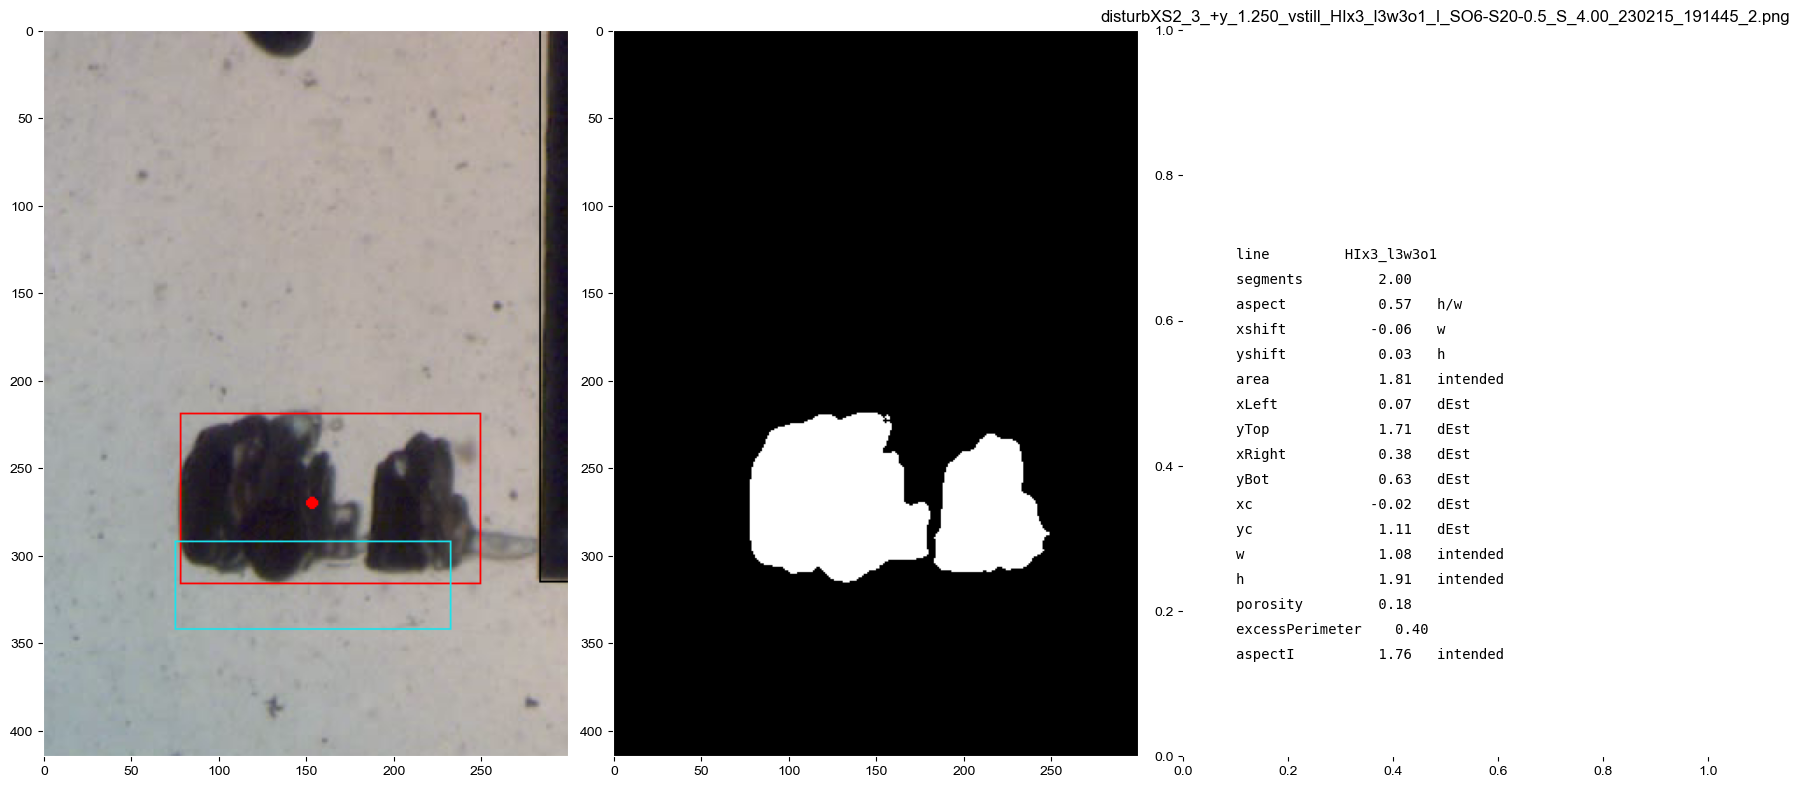

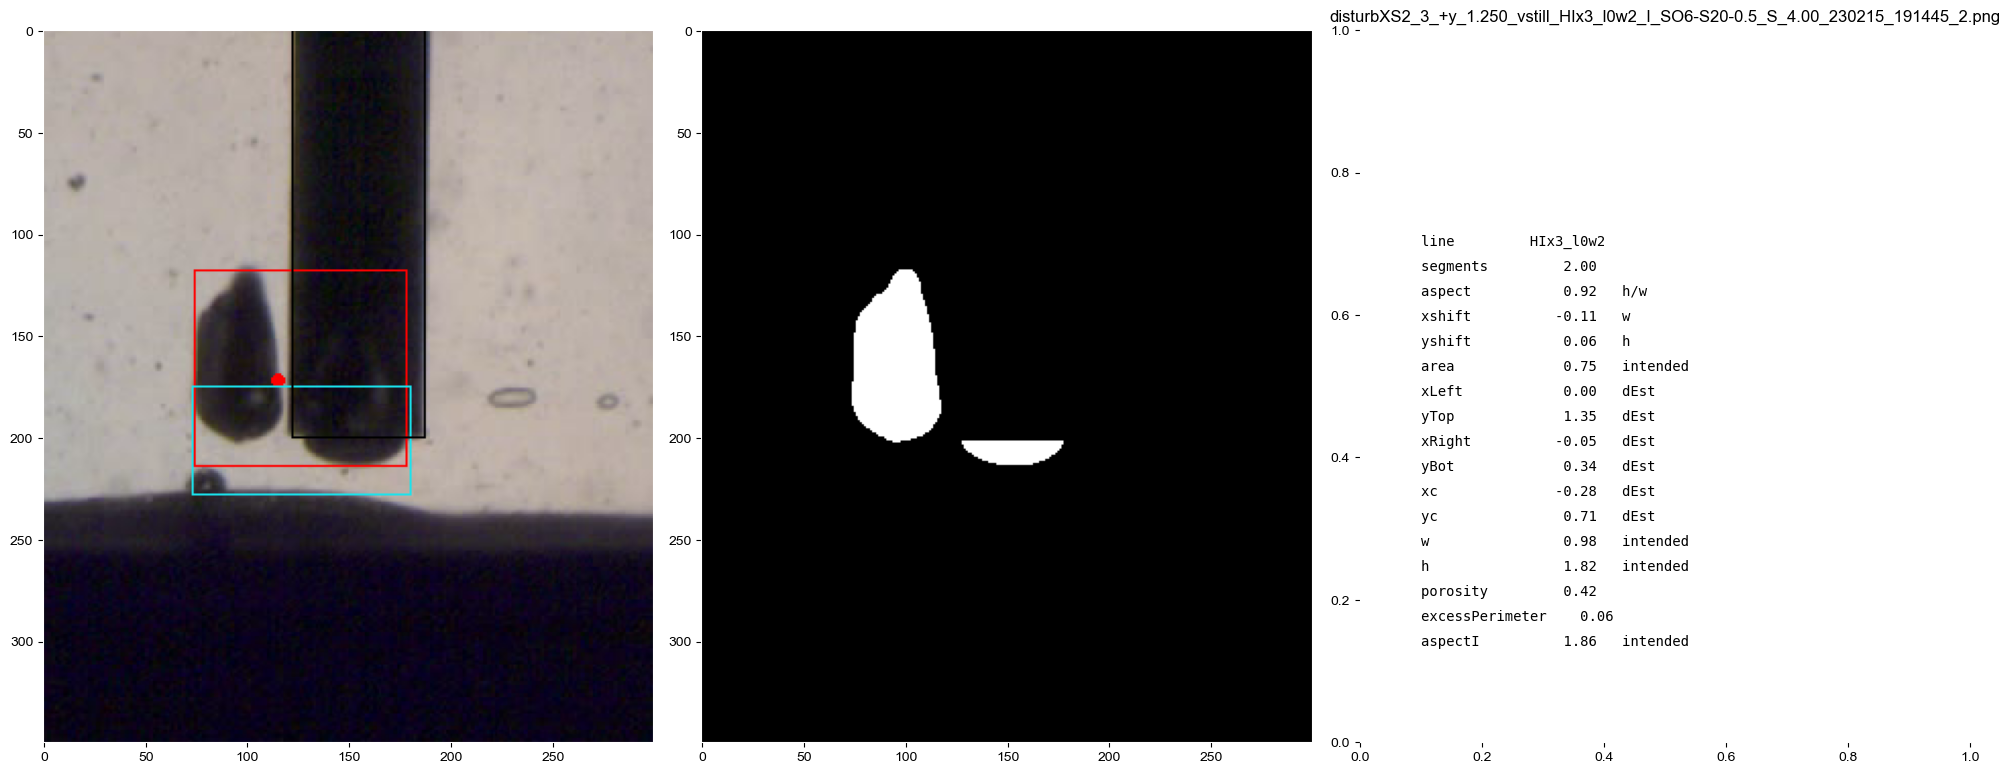

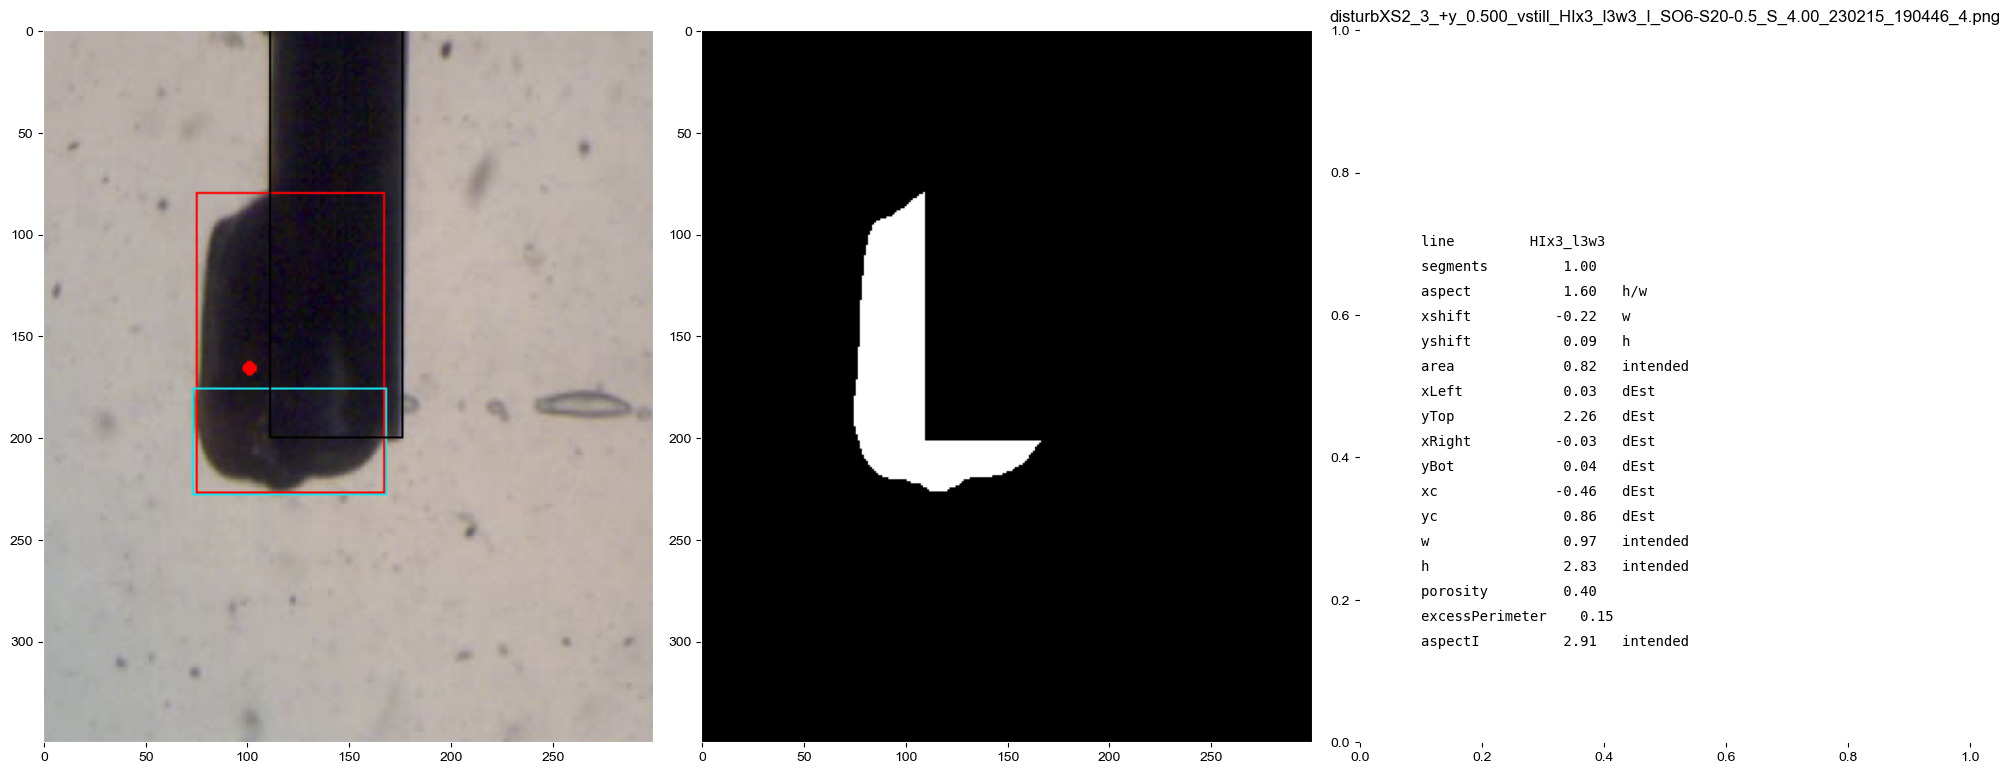

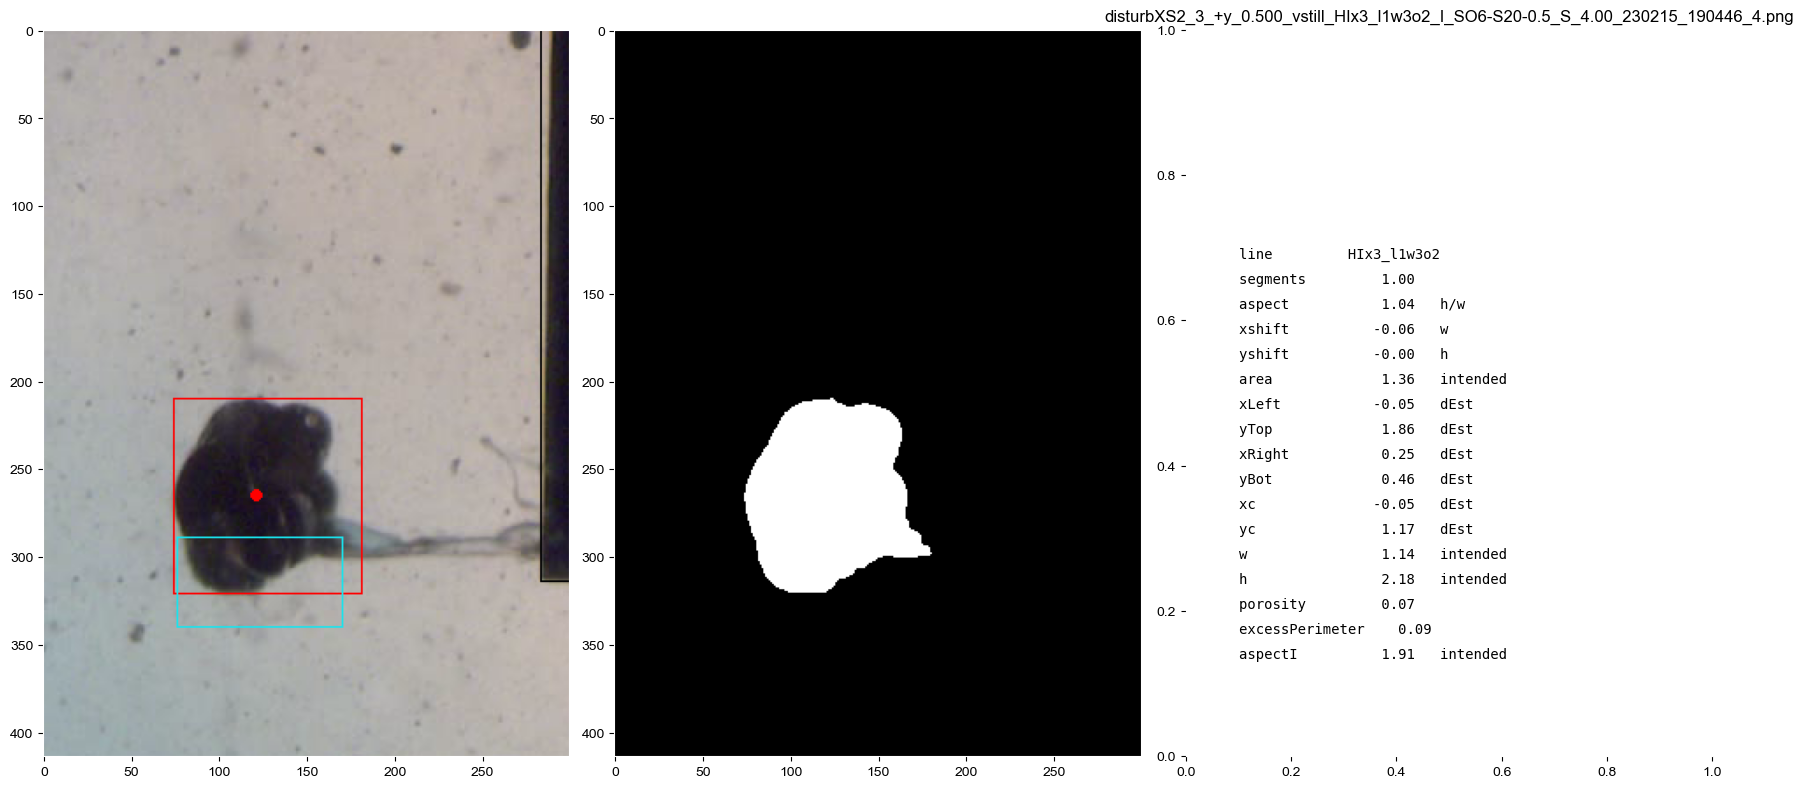

In [25]:
ut.keepAllTests()

In [101]:
ut.openCSV()

In [37]:
ut.openExplorer(i)

# test single folder

measure all files and summarize for a single folder

In [35]:
from folder_metric import whiteOutFiles
fstr = r'SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_3_1.250'
folder = os.path.join(cfg.path.server, fstr)
whiteOutFiles(folder, ['_l0'], [])

INFO: Whited out \SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_3_1.250\disturbHoriz3_3_1.250_vstill_HOh3_l0w1o1_I_SO8-S85-0.05_S_3.00_230511_155213_0.png
INFO: Whited out \SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_3_1.250\crop\disturbHoriz3_3_1.250_vcrop_HOh3_l0w1o1_I_SO8-S85-0.05_S_3.00_230511_155213_0.png
INFO: Blacked out \SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_3_1.250\Usegment\disturbHoriz3_3_1.250_Usegment_HOh3_l0w1o1_I_SO8-S85-0.05_S_3.00_230511_155213_0.png
INFO: Blacked out \SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_3_1.250\MLsegment\disturbHoriz3_3_1.250_MLsegment_HOh3_l0w1o1_I_SO8-S85-0.05_S_3.00_230511_155213_0.png
INFO: Whited out \SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_3_1.250\disturbHoriz3_3_1.250_vstill_HOh3_l0w1o2_I_SO8-S85-0.05_S_3.00_230511_155213_0.png
INFO: Whited out \SD

In [37]:
fstr = r'SDT\SO_S20-0.5\I_SO8-S20-0.5_S_4.00\I_SO8-S20-0.5_S_4.00_230510\disturbHoriz3_3_0.875'
folder = os.path.join(cfg.path.server, fstr)
fv = me.folderHorizSDT(folder, overwriteMeasure=True, overwriteSummary=True, diag=0, overrideSegment=True)
fv.measureFolder();
fv.summarize();

Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o1_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o2_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o3_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o4_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o5_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o6_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o7_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1o8_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1p1_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1p2_I_SO8-S20-0.5_S_4.00_230510_135844_2.png
Exported disturbHoriz3_3_0.875_Usegment_HOh3_l0w1p3_I_SO8-S20-0.5_S_4.

In [251]:
fv.failures.loc[1]['file']

'//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTriple\\SO\\I_SO10_S_3.00\\I_SO10_S_3.00_230208\\disturbHoriz3_1_0.750\\disturbHoriz3_1_0.750_vstill_HOh1_l0w1o7_I_SO10_S_3.00_230208_095648_0.png'

In [76]:
fv.df.columns

Index(['line', 'gname', 'ltype', 'pr', 'pname', 'time', 'wtime', 'zdepth',
       'segments', 'yTop', 'w', 'h', 'yBot', 'yc', 'roughness', 'emptiness',
       'meanT', 'stdevT', 'minmaxT', 'vintegral', 'dy0l', 'dy0lr', 'dyfl',
       'dyflr', 'space_l', 'space_b', 'ldiff'],
      dtype='object')

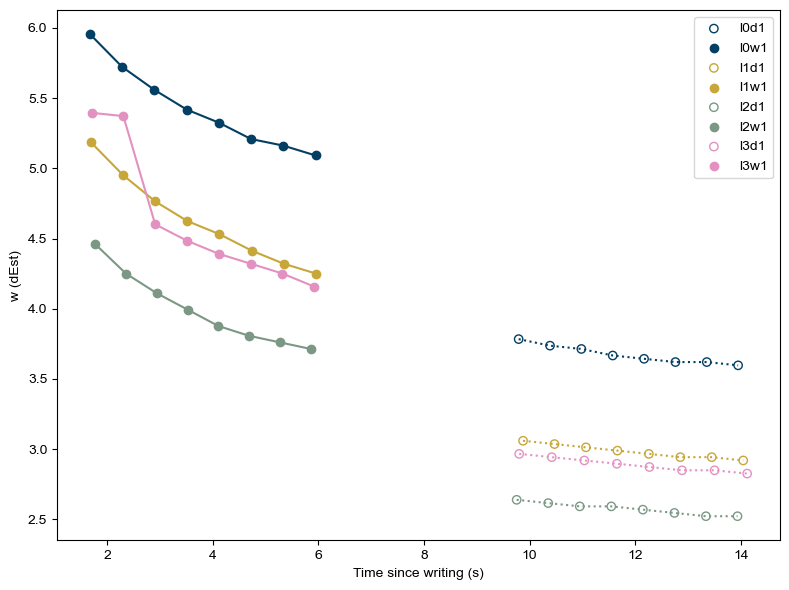

In [124]:
fv.plotValue('w')

In [36]:
def switchToBN(folder:str) -> None:
    pfd = fh.printFileDict(folder)
    try:
        cl = pfd.cropLocs
    except AttributeError:
        return
    df,u = me.plainIm(cl, ic=0)
    if len(df)>0 and 'singleDoubleTriple' in df.loc[0,'vstill']:
        df['vstill'] = [os.path.basename(f) for f in df['vstill']]
        me.plainExp(cl, df, u)

In [58]:
def switchToSDT(folder:str) -> None:
    pfd = fh.printFileDict(folder)
    try:
        cl = pfd.failures
    except AttributeError:
        return
    df,u = me.plainIm(cl, ic=0)
    if len(df)>0 and 'singleDoubleTriple' in df.loc[0,'file']:
        df['file'] = [f.replace('singleDoubleTriple', 'SDT') for f in df['file']]
        me.plainExp(cl, df, u)